# Sensor Based Activity Recoginition 
Challenge: cdl1 - Sensor based Activity Recognition  
Team: Lea Bütler, Manjavy Kirupa, Etienne Roulet, Si Ben Tran  

Aufgabe: Visualisierungen der gemessenen Sensordaten

Hier in diesem Notebook visualisieren wir alle gemessenen Sensordaten und versuchen so zu identifizieren, welche aufgenommenen Sensordaten von relevanz sein können bzw. welche widerum nicht, indem wir die Visualisierungen uns anschauen und uns überlegen, ob wir diese Daten für die Klassifizierung brauchen oder nicht.

In [1]:
# Laden von Libraries
%pip install -r requirements.txt
from data_ingestion.pipeline_manager import PipelineRunner as PipelineRunner 
from data_ingestion import utilities as util
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
import seaborn as snsb
import polars as pl

You should consider upgrading via the 'c:\Users\Si Ben Tran\venv\cdl1\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
# Daten einlesen und Ausgeben 
path = "Messungen"
pipeline = None
origin = "SensorLogger"

runner = PipelineRunner(path)
runner.set_origin(origin)
runner.set_pipeline(pipeline)
data = runner.run()
path: pathlib.Path = "Export.arrow"
data.write_ipc(path)
data

Read Files:   0%|          | 0/210 [00:00<?, ?files/s]

time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class
datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str
2023-02-27 15:02:04.548,0.0,-3.552,-9.14,null,null,null,null,null,null,0.161765,-0.08829,-0.470671,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:17.156,0.0,9.722,1.278,null,null,null,null,null,null,-0.21775,-0.719579,0.631111,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:31.574,-0.728,9.779,0.0,null,null,null,null,null,null,-0.42065,0.568356,-0.598058,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:16.685,null,null,null,null,null,null,0.0,43.5,-13.14375,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:32.295,null,null,null,null,null,null,-13.012501,0.0,20.587502,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:33.285,null,null,null,null,null,null,-22.612501,0.0,20.268751,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:35.195,null,null,null,null,null,null,-12.1125,0.0,20.75625,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:45.315,null,null,null,null,null,null,-21.243752,0.0,16.9125,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:48.985,null,null,null,null,null,null,-41.100002,0.0,-3.24375,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""


In [11]:
# groupby id, user and class, select first and groupby again with user, class aggregate with count, sort and rename count column
data_n_obs = data.groupby(["id", "user", "class"]).first().groupby(["user", "class"]).count().sort(["user", "class"]).rename({"count": "number of measurements"})

# display data_n_obs
display("Number of measurements per user and class", data_n_obs.head())


'Number of measurements per user and class'

user,class,number of measurements
str,str,u32
"""Ben_Tran""","""Laufen""",8
"""Ben_Tran""","""Rennen""",6
"""Ben_Tran""","""Sitzen""",13
"""Ben_Tran""","""Stehen""",12
"""Ben_Tran""","""Treppenlaufen""",18


In [15]:
# cast polars data_n_obs into pandas dataframe
data_n_obs_pd = data_n_obs.to_pandas()

# display data_n_obs_pd
display("Number of measurements per user and class", data_n_obs_pd)

# print the number of user and number of classes
print("Number of Users: ", len(data_n_obs_pd["user"].unique()), "\nNumber of Classes: ", len(data_n_obs_pd["class"].unique()))

'Number of measurements per user and class'

,user,class,number of measurements
0,Ben_Tran,Laufen,8
1,Ben_Tran,Rennen,6
2,Ben_Tran,Sitzen,13
3,Ben_Tran,Stehen,12
4,Ben_Tran,Treppenlaufen,18
5,Ben_Tran,Velofahren,12
6,Etienne_Roulet,Sitzen,5
7,Etienne_Roulet,Stehen,1
8,Etienne_Roulet,Treppenlaufen,2
9,Etienne_Roulet,Velofahren,6


Number of Users:  11 
Number of Classes:  7


Hier in dieser Tabelle erkennen wir die Anzahl aufgenommenen Sensormessung pro Person und pro Bewegungsprofil. 

Wir erkennen, das hier 7 Bewegungsprofile vorhanden sind, auffallend dabei sind die Dateien von Weiping_Zhang, welche die Bewegungsprofile Treppenlaufen in hochlaufen und runterlaufen unterschieden hat. Das Problem laesst sich beheben, indem wir die Dateien in einen Ordner namens "Treppenlaufen" bei "Weiping_Zhang" verschieben und anschliessend wieder einlesen.

IndexError: index 2 is out of bounds for axis 0 with size 2

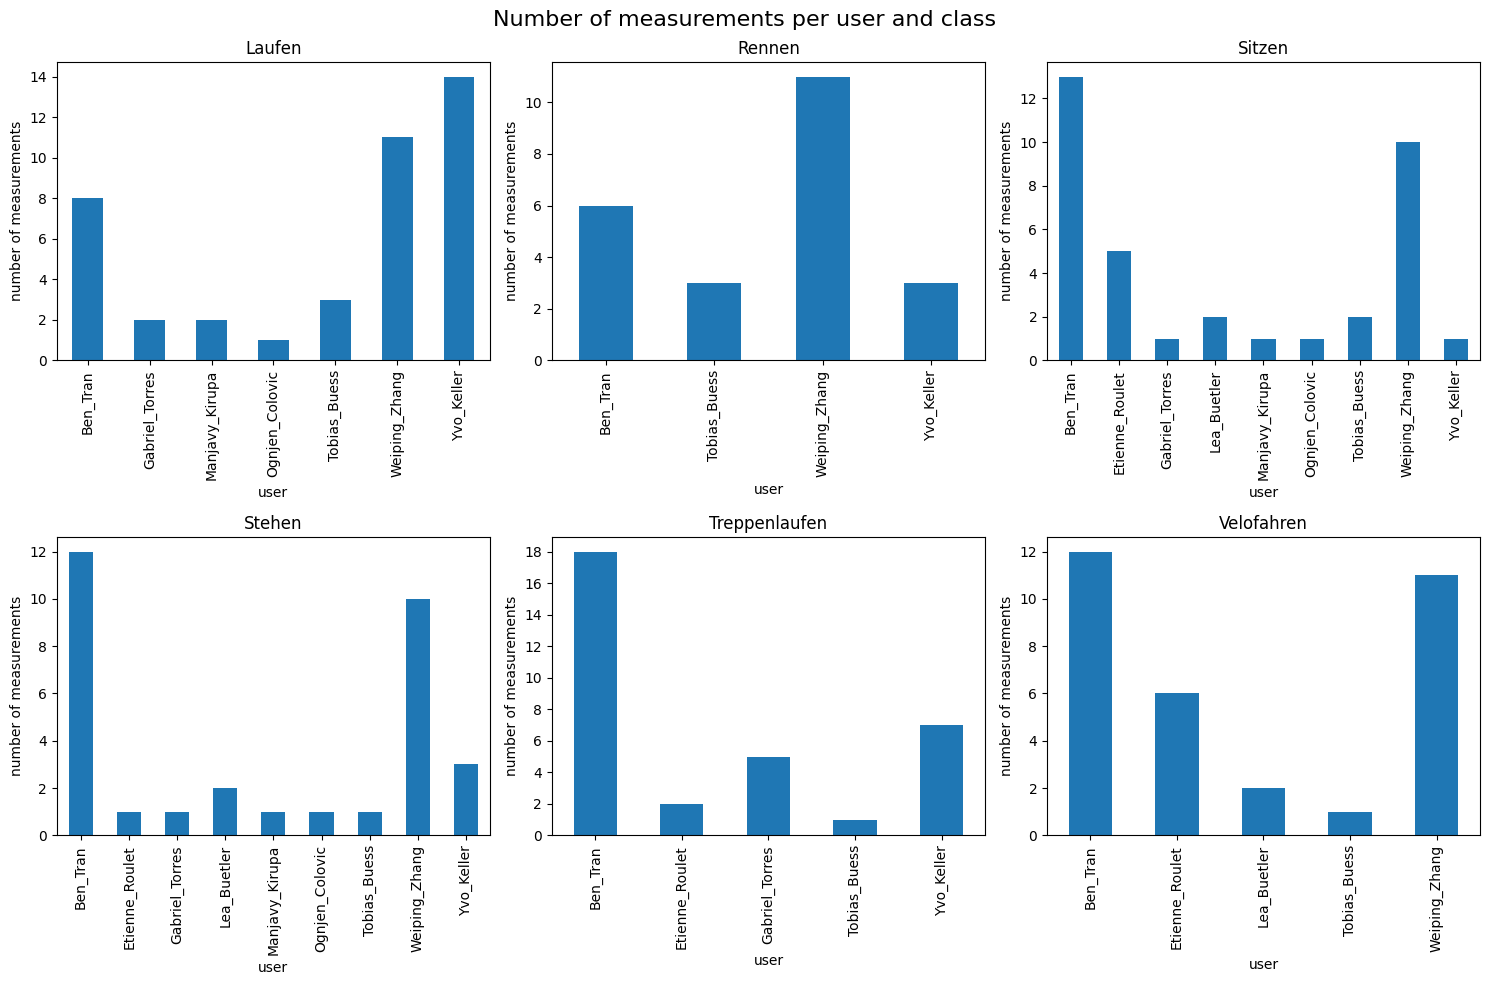

In [22]:
# create 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
# create for each class in data_n_obs a barplot with user on x-axis and number of measurements on y-axis
for i, class_ in enumerate(data_n_obs_pd["class"].unique()):
    data_n_obs_pd[data_n_obs_pd["class"] == class_].plot.bar(x="user", y="number of measurements", ax=axs[i//3, i%3], title=class_)
    axs[i//3, i%3].set_ylabel("number of measurements")
    axs[i//3, i%3].set_xlabel("user")
    axs[i//3, i%3].yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    fig.suptitle("Number of measurements per user and class", fontsize=16)
    axs[i//3, i%3].legend().set_visible(False)
    plt.tight_layout()
plt.show()

In diesen 6 Plots erkennen wir die Verteilungen unserer Daten, die wir gruppenuebergreifend aufgenommen haben.

## Aufteilung des DataFrames in Bewegungsprofilen

In [4]:
data_laufen = data.filter(pl.col("class") == "Laufen")

data_sitzen = data.filter(pl.col("class") == "Sitzen")

data_stehen = data.filter(pl.col("class") == "Stehen")

data_rennen = data.filter(pl.col("class") == "Rennen")

data_treppensteigen = data.filter(pl.col("class") == "Treppenlaufen")

data_velofahren = data.filter(pl.col("class") == "Velofahren")

In [5]:
data_laufen

time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class
datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str
2023-02-27 15:02:04.548,0.0,-3.552,-9.14,null,null,null,null,null,null,0.161765,-0.08829,-0.470671,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:17.156,0.0,9.722,1.278,null,null,null,null,null,null,-0.21775,-0.719579,0.631111,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:31.574,-0.728,9.779,0.0,null,null,null,null,null,null,-0.42065,0.568356,-0.598058,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:16.685,null,null,null,null,null,null,0.0,43.5,-13.14375,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:32.295,null,null,null,null,null,null,-13.012501,0.0,20.587502,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:33.285,null,null,null,null,null,null,-22.612501,0.0,20.268751,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:35.195,null,null,null,null,null,null,-12.1125,0.0,20.75625,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:45.315,null,null,null,null,null,null,-21.243752,0.0,16.9125,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:48.985,null,null,null,null,null,null,-41.100002,0.0,-3.24375,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""


## Bwegungsprofil: Laufen

## Bewegungsprofil: Sitzen

## Bewegungsprofil: Stehen

## Bewegungsprofil: Rennen

## Bewegungsprofil: Treppensteigen

## Bewegungsprofil: Velofahren